## Project:-
- Comprehensive Evaluation of Machine Learning
- Select the Best Classifier Model on Iris Dataset.
# Author:- 
- Mohsin Shareef
### Contact info:-
- [Kaggle](https://www.kaggle.com/mohsin31202)
- [Github](https://github.com/MohsinShareef)
- [Linkedin](www.linkedin.com/in/mohsin-shareef-9231a1294)

### Introduction:- 
The primary objective of this notebook is to conduct a thorough evaluation of various machine learning classification models, to identify the most accurate algorithm for predicting the target variable. 

### Goals:-
- Compare the range of differant machine learning algorithms for classification tasks.
- To select the top-performing model based on key performance metrics.
- To apply the chosen model to dummy data for prediction validation.
### Classification Algorithms use in notebook:- 
- Logistic Regression
- Support Vector Classifier (SVC)
- Decision Tree Classifier
- Random Forest Classifier
- Gradient Boosting Classifier
- AdaBoost Classifier
- K-Nearest Neighbors Classifier
- XGBoost Classifier
- CatBoost Classifier
- LightGBM Classifier
- GaussianNB
- BernoulliNB

### Dataset Overview
- The dataset urder scrutiny is the Ires dataset.
- This dataset is taken from seaborn library.
- The key features included in the dataset are as follows:
  - `sepal_length`:- Sepal length of species.
  - `sepal_width`:- Sepal width of species.
  - `petal_length`:- Petal length of species.
  - `petal_width`:- Petal width of species.
  - `species`:- Name of species in this column.

### Data Preprocessing
- Check the missing values
- Check the outliers 
- Data Distribution
- Feature Engineering if we need

### Load the important libraries

In [2]:
# Data Manipulation Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Machine Learning libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, QuantileTransformer,FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
import pickle

import warnings
warnings.filterwarnings('ignore')

- Load the Iris dataset from seaborn library

In [3]:
df = sns.load_dataset('Iris')

- First look of the DataFrame

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
# Shape of the dataset 
print("Shape of the dataset:: ")
print("-"*30)
# Number of columns
print("Number of Columns:: ", df.shape[1])
# Number of rows
print("Number of Rows:: ", df.shape[0])


Shape of the dataset:: 
------------------------------
Number of Columns::  5
Number of Rows::  150


In [6]:
# DataFrame information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
# Print the data types of each column
def feachers_data_types(df):
    # Count the number of categorical column
    cat_count = df.select_dtypes(include='object').shape[1]
    # Count the number of float column
    float_count = df.select_dtypes(include='float').shape[1]
    # Count the number of integer column
    int_count = df.select_dtypes(include='int').shape[1]
    
    # Print the data types of each column
    print(f"• Total feachers: {df.shape[1]}")
    print(f"• Categorical columns: {cat_count}")
    print(f"• Float columns: {float_count}")
    print(f"• Integer columns: {int_count}")

# Call the function 
print('Data Summary')
print('-'*30)
feachers_data_types(df)


Data Summary
------------------------------
• Total feachers: 5
• Categorical columns: 1
• Float columns: 4
• Integer columns: 0


In [8]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
# Rename the columns 
df.rename(columns={'sepal_lenght':'Sepal_Length','sepal_width':'Sepal_Width','petal_lenght':'Petal_Length','petal_width':'Petal_Width','species':'Species'}, inplace=True)
# Retrieve and store the list of updated column names from the DataFrame
cols = df.columns.tolist()
# Display the updated column names with a heading
print("Updated Tips Dataset Columns")
# Iterate and print each column name with a bullet point
for col in cols:
    print("- " + col)

Updated Tips Dataset Columns
- sepal_length
- Sepal_Width
- petal_length
- Petal_Width
- Species


### Statistics Summary 

In [10]:
# Print the statistical summary of the DataFrame
df.describe()

,sepal_length,Sepal_Width,petal_length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Observation Statistics
- Four columns/attributes are numarical
- Mean of `Sepal_Length` is 5.843333 and std is 0.828066
- Minimum value of sapal length is 4.300000 and maximum value is 7.900000	
- Mean of `Sepal_Width` is 3.057333 and std is 0.435866
- Minimum value of sapal width is 2.000000 and maximum tip is 4.400000
- Mean of `Petal_Length` 3.758000 and std is 1.765298
- Minimum value of petal length is 1.000000 and maximum is 6.900000
- Mean of `Petal_Width` 1.199333 and std is 0.762238
- Minimum value of petal length is 0.100000 and maximum is 2.500000

# Check the Missing values

sepal_length    0
Sepal_Width     0
petal_length    0
Petal_Width     0
Species         0
dtype: int64


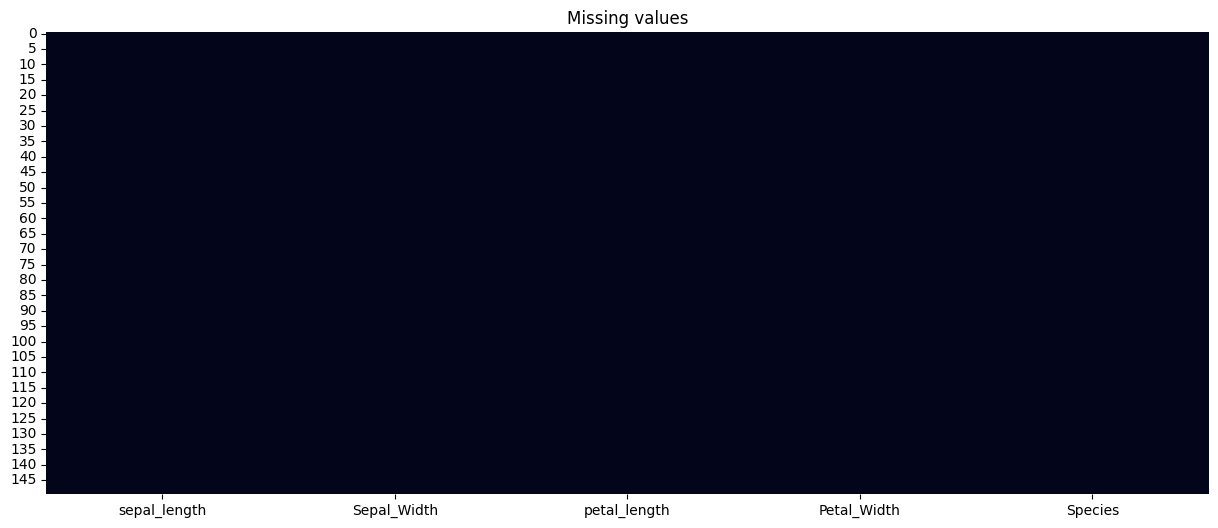

In [11]:
# Check the missing values
print(df.isnull().sum())
# Plotting heatmap to check missing values after imputation
plt.figure(figsize=(15, 6))
sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing values')
plt.show()

<center>Figure 1. <b>Missing Values Inspection</b></center>

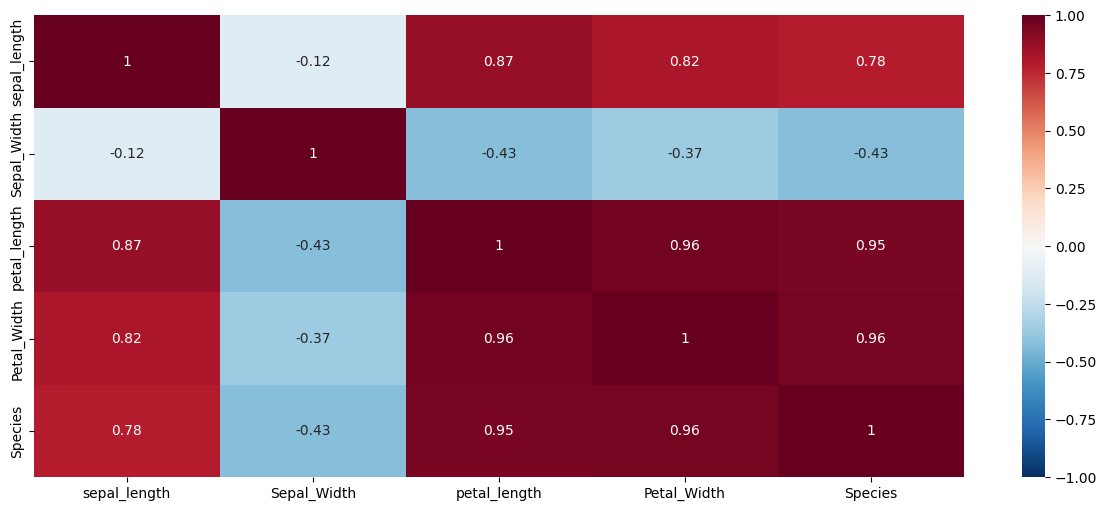

In [12]:
# Plot the correlation matrix
# Generate the new dataframe 
cor_df = df.copy()
# Define the label encoder
le = LabelEncoder()
# Encode the Species column
cor_df['Species'] = le.fit_transform(cor_df['Species'])
# Plot the correlation matrix
correlation= cor_df.corr()
plt.figure(figsize=(15,6))
sns.heatmap(correlation, annot=True, cmap='RdBu_r', vmin=-1, vmax=1)
plt.show()

<center>Figure 1. <b>Correlation Matrix</b></center>

In [13]:
# Get the numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Calculate the skewness for each numerical column
skewness = df[numerical_cols].skew()

# Create a DataFrame with skewness values as a single row
skewness_df = pd.DataFrame({'Skewness': skewness})

# Print the skewness DataFrame
print("Data Distribution - Skewness")
round(skewness_df,3)

Data Distribution - Skewness


,Skewness
sepal_length,0.315
Sepal_Width,0.319
petal_length,-0.275
Petal_Width,-0.103


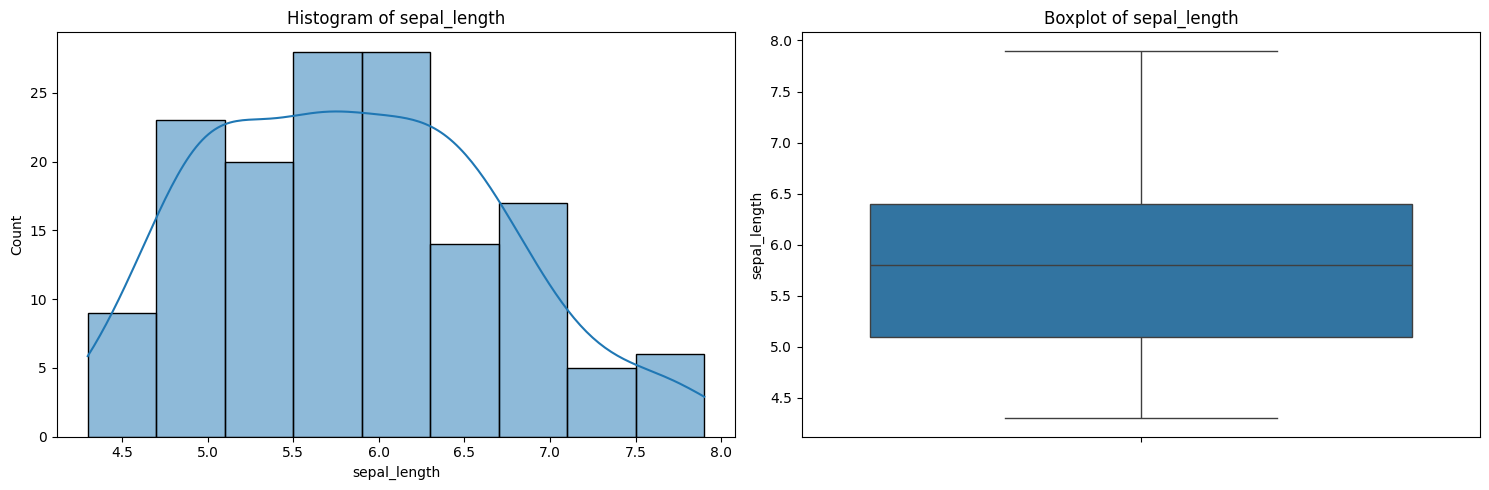

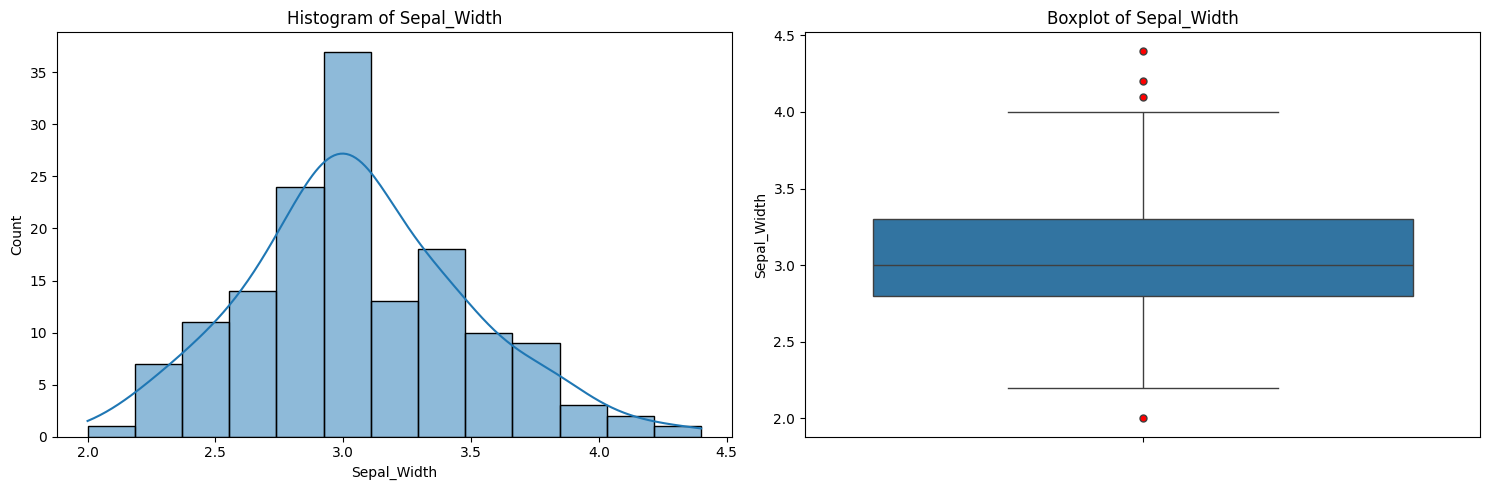

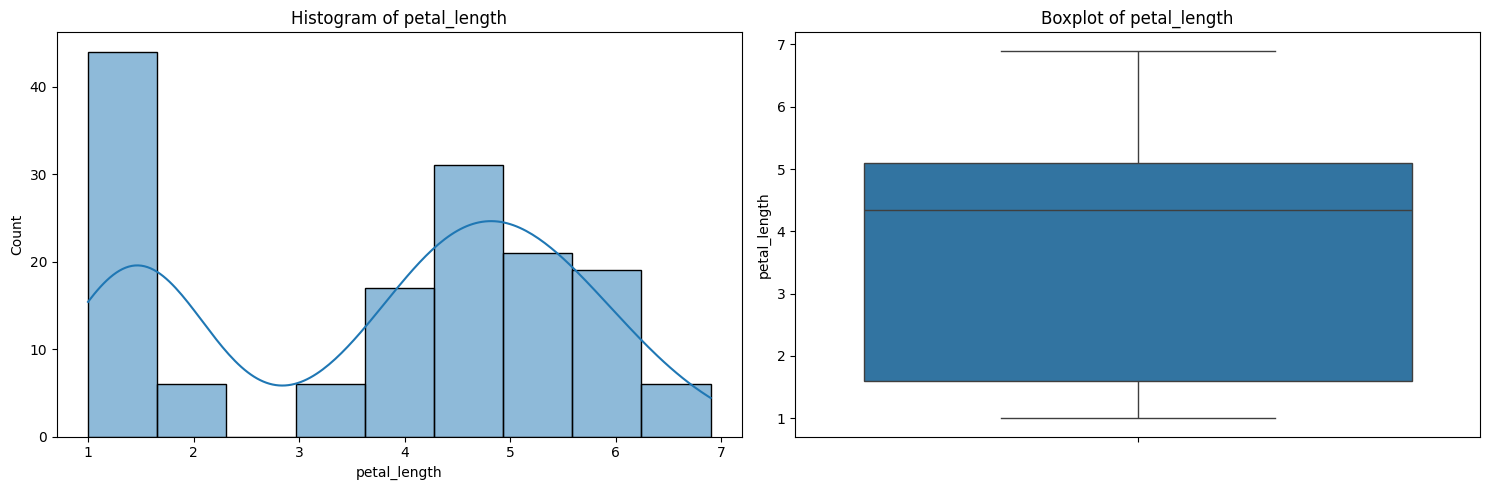

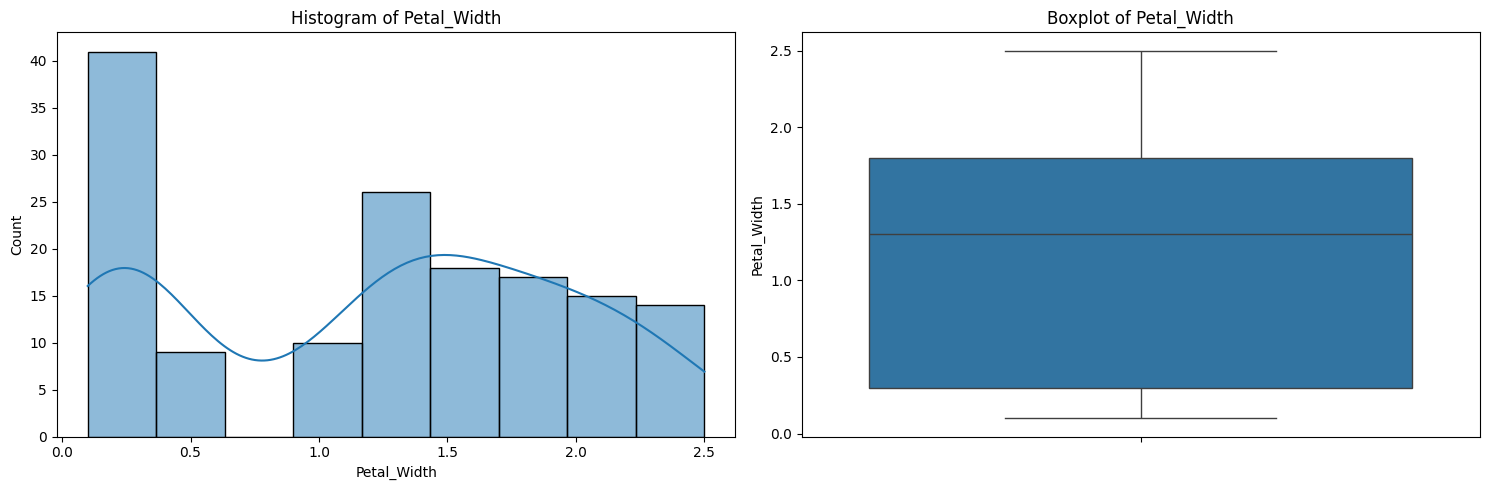

In [14]:
# Define a function to plot histogram and boxplot
def plot_histogram_and_boxplot(data):
    # Select only numerical columns
    numerical_columns = data.select_dtypes(include="number").columns
    # Loop through each numerical column

    for column in numerical_columns:
        # Create subplots for histogram and boxplot
        fig, axes = plt.subplots(1, 2, figsize=(15, 5))

        # Histogram plot
        sns.histplot(data=data, x=column, kde=True, ax=axes[0])
        axes[0].set_title(f"Histogram of {column}")

        # Boxplot plot
        sns.boxplot(data=data, y=column, ax=axes[1], flierprops=dict(marker='o', markerfacecolor='red', markersize=5))
        axes[1].set_title(f"Boxplot of {column}")

        plt.tight_layout()
        plt.show()

# Call the function to plot histogram and boxplot
plot_histogram_and_boxplot(df)

<center>Figure 3. <b>Histogram and Boxplot</b></center>

In [16]:
# lebel encoding the categorical columns using for loop
for column in df.select_dtypes(include='object').columns:
  df[column] = LabelEncoder().fit_transform(df[column])

df.head()

,sepal_length,Sepal_Width,petal_length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Start Machine Learning Task

In [18]:
# Split the data into features and target
X = df.drop('Species', axis=1)
y = df['Species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Comprehensive Model Evaluation
- Classification Models with Hyperparameters Configuration

In [25]:
# Dictionary of classifier models with their respective hyperparameters for grid search
models ={
    'Logistic Regression': {
        'model': LogisticRegression(),
        'params': {
            
        }
    },
    'SVM': {
        'model': SVC(),
        'params': {
            'model__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'model__C': [0.1, 1, 10],
        }
    },
    'Decision Tree Classifier': {
        'model': DecisionTreeClassifier(),
        'params': {
            'model__splitter': ['best', 'random'],
            'model__max_depth': [None, 1, 2, 3, 4]
        }
    },
    'Random Forest Classifier': {
        'model': RandomForestClassifier(),
        'params': {
            'model__n_estimators': [10, 100],
            'model__max_depth': [None, 1, 2, 3, 4],
            'model__max_features': ['auto', 'sqrt', 'log2']
        }
    },
    'Gradient Boosting Classifier': {
        'model': GradientBoostingClassifier(),
        'params': {
            'model__n_estimators': [10, 100],
            'model__max_depth': [None, 1, 2, 3, 4]
        }
    },
    'Ada Boost Classifier': {
        'model': AdaBoostClassifier(),
        'params': {
            'model__n_estimators': [10, 100],
        }
    },
    'K-Nearest Neighbors Classifier': {
        'model': KNeighborsClassifier(),
        'params': {
            'model__n_neighbors': [3, 5, 7],
        }
    },
    'XGB Classifier': {
        'model': XGBClassifier(),
        'params': {
            'model__n_estimators': [10, 100],
            'model__max_depth': [None, 1, 2, 3, 4]
        }
    },
    'Cat Boost Classifier': {
        'model': CatBoostClassifier(),
        'params': {
            'model__n_estimators': [10, 100],
            'model__depth': [1, 2, 3, 4]
        }
    },
    'LGBM Classifier': {
        'model': LGBMClassifier(),
        'params': {
            'model__n_estimators': [10, 100],
            'model__max_depth': [None, 1, 2, 3],
            'model__learning_rate': [0.1, 0.2, 0.3],
            'model__verbose': [-1]
        }
    },
    'Gaussian Naive Bayes': {
        'model': GaussianNB(),
        'params': {
            
        }
    },
    # 'Multinomial Naive Bayes': {
    #     'model': MultinomialNB(),
    #     'params':{

    #     }
    # },
    # 'BernoulliNB':{
    #     'model':{
    #     'params':{}
    #     }
    # },
}

In [26]:
# Initialize a list to store model performance metrics
model_scores = []
best_accuracy = 0
best_estimator = None
for name, model in models.items():
    # Create a pipeline with data scaling and the model
    pipeline = Pipeline([
        ('Scaler', QuantileTransformer(output_distribution="normal", n_quantiles=6400, random_state=42)),
        ('model', model['model'])
    ])

    # Initialize RandomizedSearchCV with the model's hyperparameter grid
    random_search = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=model['params'],
        cv=5,
        scoring='accuracy',
        verbose=0,
        n_jobs=-1,
        random_state=42
    )
  
    # Fit the RandomizedSearchCV object to the training data
    random_search.fit(X_train, y_train)
    # Predict the target variable for the test set
    y_pred = random_search.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    # Append performance metrics of the current model to the list
    model_scores.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1 Score': f1_score(y_test, y_pred, average='weighted')
    })

    if accuracy > best_accuracy:  
        best_accuracy = accuracy
        best_estimator = random_search.best_estimator_

# Sort the models based on their name
sorted_models = sorted(model_scores, key=lambda x: x['Model'], reverse=False)
# Convert sorted model performances to a DataFrame
metrics = pd.DataFrame(sorted_models)

# Identify the best performing model based on accuracy
best_clf_model = max(sorted_models, key=lambda x: x['Accuracy'])

# Custom function to print a heading or replace it with a simple print statement
print("Classification Models Performance")
metrics.round(2)

Learning rate set to 0.5
0:	learn: 0.7673260	total: 348us	remaining: 3.13ms
1:	learn: 0.5617550	total: 676us	remaining: 2.7ms
2:	learn: 0.4591455	total: 926us	remaining: 2.16ms
3:	learn: 0.3650064	total: 1.18ms	remaining: 1.77ms
4:	learn: 0.3157750	total: 1.42ms	remaining: 1.42ms
5:	learn: 0.2624907	total: 1.66ms	remaining: 1.1ms
6:	learn: 0.2349666	total: 1.89ms	remaining: 809us
7:	learn: 0.2123239	total: 2.11ms	remaining: 528us
8:	learn: 0.1969488	total: 2.35ms	remaining: 260us
9:	learn: 0.1867133	total: 2.57ms	remaining: 0us
Classification Models Performance


,Model,Accuracy,Precision,Recall,F1 Score
0,Ada Boost Classifier,1.00,1.00,1.00,1.00
1,Cat Boost Classifier,1.00,1.00,1.00,1.00
2,Decision Tree Classifier,1.00,1.00,1.00,1.00
3,Gaussian Naive Bayes,1.00,1.00,1.00,1.00
4,Gradient Boosting Classifier,1.00,1.00,1.00,1.00
5,K-Nearest Neighbors Classifier,1.00,1.00,1.00,1.00
6,LGBM Classifier,1.00,1.00,1.00,1.00
7,Logistic Regression,1.00,1.00,1.00,1.00
8,Random Forest Classifier,1.00,1.00,1.00,1.00
9,SVM,0.97,0.97,0.97,0.97


In [28]:
# Print the best model's performance metrics
print("BEST CLASSIFICATION MODEL PERFORMANCE")
print(f"Model: {best_clf_model['Model']}")
print(f"Accuracy: {best_clf_model['Accuracy']:.2f}")
print(f"Precision: {best_clf_model['Precision']:.2f}")
print(f"Recall: {best_clf_model['Recall']:.2f}")
print(f"F1 Score: {best_clf_model['F1 Score']:.2f}")

BEST CLASSIFICATION MODEL PERFORMANCE
Model: Ada Boost Classifier
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
